# Numerical Differentiation and Integration

## Numerical Differentiation Given Data

Suppose $f(x)$ is only known at a discrete set of points $a = x_1 < x_2 < \cdots < x_n = b$. Approximate $f'(x)$ at the given nodes. 

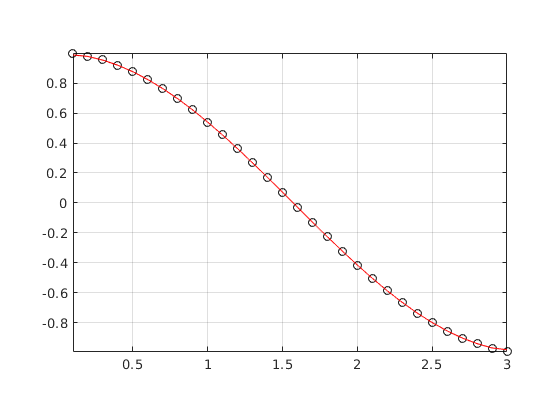

In [1]:
x = 0.1:0.1:3;
fx = sin(x);

n = length(x);
dfdx = zeros(size(fx));
h = x(2) - x(1);
dfdx(1) = (fx(2)-fx(1))/h;              % forward difference (1st-order)
dfdx(2:end-1) = ...
    (fx(3:end)-fx(1:end-2))/(2*h);      % centered difference (2nd-order)
dfdx(end) = (fx(end)-fx(end-1))/h;      % backward difference (1st-order)

figure(1)
plot(x, cos(x), 'ko')
hold on
plot(x, dfdx, 'r')
axis image
grid on

### Exercise:
Modify the previous program to use 2nd-order FD and BD formulas at the end points.

## Minimization of Error for Numerical Differentiation

Consider $f(x) = \sin(x^2)$ whose derivative is easily calculated: 
$f'(x) = 2x \cos(x^2)$.

We will calculate $f'(1/3)$ using FD and CD formulas with various $h$ values and examine how error changes. 

In [2]:
f = @(x) sin(x.^2);
fprime = @(x) 2*x.*cos(x.^2);
Df1f = @(x,h) (f(x+h) - f(x))./h;
Df2f = @(x,h) (-3*f(x) + 4*f(x+h) - f(x+2*h))./(2*h);
Df2c = @(x,h) (f(x+h) - f(x-h))./(2*h);
x = 1/3;
h = 0.1;
fprintf(' %12s %16s %16s %16s\n',...
        'h', 'error(1FD)', 'error(2FD)', 'error(2CD)');
fprintf(' %63s\n', repmat('-', 1, 63));
for j = 1:10
    fpx = fprime(x);
    Err = [Df1f(x,h), Df2f(x,h), Df2c(x,h)] - fpx;
    fprintf(' %12.4e %16.4e %16.4e %16.4e \n', h, Err)
    h = h/2;
end

            h       error(1FD)       error(2FD)       error(2CD)
 ---------------------------------------------------------------
   1.0000e-01       9.5380e-02       4.6076e-03      -1.2624e-03 
   5.0000e-02       4.8116e-02       8.5127e-04      -3.0953e-04 
   2.5000e-02       2.4149e-02       1.8138e-04      -7.7002e-05 
   1.2500e-02       1.2095e-02       4.1777e-05      -1.9227e-05 
   6.2500e-03       6.0526e-03       1.0020e-05      -4.8052e-06 
   3.1250e-03       3.0275e-03       2.4532e-06      -1.2012e-06 
   1.5625e-03       1.5141e-03       6.0692e-07      -3.0029e-07 
   7.8125e-04       7.5711e-04       1.5094e-07      -7.5073e-08 
   3.9063e-04       3.7857e-04       3.7635e-08      -1.8768e-08 
   1.9531e-04       1.8929e-04       9.3965e-09      -4.6921e-09 


Now we modify the code above to calculate errors associated with 1st-order FD, 2nd-order CD, and 4th-order CD. 
For the record, the 4th-order CD formula is given by
$$
    D^{\rm [4c]}_h\{f\} (x) =
    \frac{ f(x-2h) - 8 f(x-h) + 8 f(x+h) - f(x+2h) }{ 12 h } .
$$

We will then plot the errors in log scale. 

            h       error(1FD)       error(2CD)       error(4CD)
 ---------------------------------------------------------------
   1.0000e-01       9.5380e-02      -1.2624e-03       1.2913e-04 
   5.0000e-02       4.8116e-02      -3.0953e-04       8.1062e-06 
   2.5000e-02       2.4149e-02      -7.7002e-05       5.0718e-07 
   1.2500e-02       1.2095e-02      -1.9227e-05       3.1707e-08 
   6.2500e-03       6.0526e-03      -4.8052e-06       1.9818e-09 
   3.1250e-03       3.0275e-03      -1.2012e-06       1.2386e-10 
   1.5625e-03       1.5141e-03      -3.0029e-07       7.7557e-12 
   7.8125e-04       7.5711e-04      -7.5073e-08       4.8594e-13 
   3.9063e-04       3.7857e-04      -1.8768e-08      -2.7645e-14 
   1.9531e-04       1.8929e-04      -4.6921e-09      -9.8810e-15 
   9.7656e-05       9.4647e-05      -1.1730e-09       1.0847e-13 
   4.8828e-05       4.7324e-05      -2.9316e-10       8.4821e-14 
   2.4414e-05       2.3662e-05      -7.3740e-11      -6.0207e-13 
   1.2207e-0

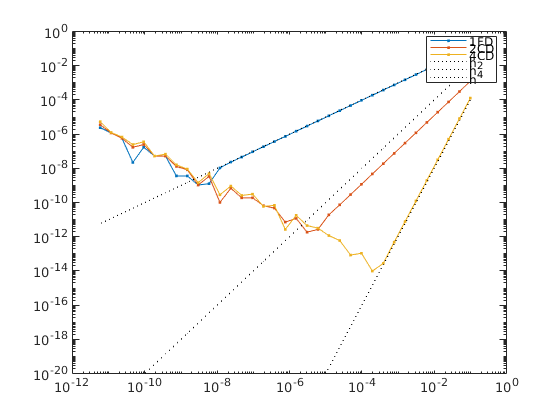

In [3]:
f = @(x) sin(x.^2);
fprime = @(x) 2*x.*cos(x.^2);
Df1f = @(x,h) (f(x+h) - f(x))./h;       
Df2f = @(x,h) (-3*f(x) + 4*f(x+h) - f(x+2*h))./(2*h);
Df2c = @(x,h) (f(x+h) - f(x-h))./(2*h); 
Df4c = @(x,h) (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))./(12*h);
x = 1/3;
fpx = fprime(x);
h0 = 0.1;
nr_h = 35;
h = h0*2.^(-[0:nr_h-1]');
A = zeros(nr_h, 4);
A(:, 1) = h;
A(:, 2) = Df1f(x, h) - fpx;
A(:, 3) = Df2c(x, h) - fpx;
A(:, 4) = Df4c(x, h) - fpx;
fprintf(' %12s %16s %16s %16s\n',...
        'h', 'error(1FD)', 'error(2CD)', 'error(4CD)');
fprintf(' %63s\n', repmat('-', 1, 63));
for j = 1:nr_h
    fprintf(' %12.4e %16.4e %16.4e %16.4e \n', A(j, :))
end

clf
figure(1)
loglog(h, abs(A(:,2)), '.-')
hold on
loglog(h, abs(A(:,3)), '.-')
loglog(h, abs(A(:,4)), '.-')
loglog(h, h, 'k:')
loglog(h, h.^2, 'k:')
loglog(h, h.^4, 'k:')
legend('1FD', '2CD', '4CD', 'h', 'h^2', 'h^4')
ylim([1e-20, 1])

## Composite Trapezoidal Method

Let $f(x) = \sin^2 x$. Here we calculate numerically
$$
    I\{f\} = \int_0^1 f(x) \; dx
$$
using composite trapezoidal rule with the equi-spaced grid points $0 = x_1 < x_2 < \cdots < x_n = 1$:
$$
    I^{\rm [t]}_h \{f\} = \frac{h}{2} (f(x_1) + f(x_n)) + h \sum_{j=2}^{n-1} f(x_j).
$$

Since the exact integral $I\{f\}$ is easily calculated, we will calculate the errors $I - I^{\rm [t]}_h$ for 
varying $h$ values and monitor how the error changes. 

            h        error 
 ------------------------- 
          0.1   7.5825e-04 
         0.05   1.8947e-04 
        0.025   4.7361e-05 
       0.0125   1.1840e-05 
      0.00625   2.9600e-06 
     0.003125   7.3999e-07 
     0.001563   1.8500e-07 
    0.0007813   4.6249e-08 
    0.0003906   1.1562e-08 
    0.0001953   2.8906e-09 
    9.766e-05   7.2264e-10 
    4.883e-05   1.8066e-10 
    2.441e-05   4.5165e-11 
    1.221e-05   1.1291e-11 
    6.104e-06   2.8231e-12 
    3.052e-06   7.0566e-13 
    1.526e-06   1.7591e-13 
    7.629e-07   4.3798e-14 
    3.815e-07   1.0825e-14 
    1.907e-07   2.0539e-15 


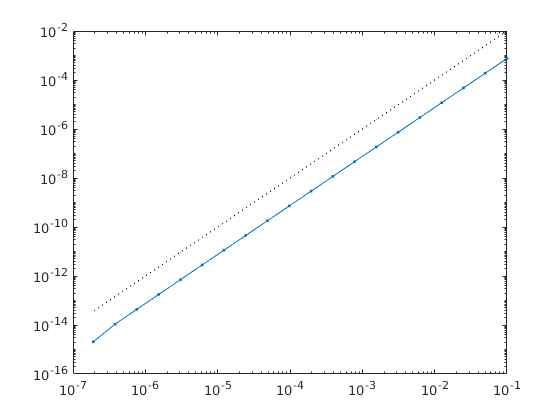

In [4]:
n = 10; % number of intervals
nrexp = 20; % number of experiments
a = 0; b = 1;
f = @(x) sin(x).^2;
f_int = @(x) x/2 - sin(2*x)/4;
exact_area = f_int(b) - f_int(a);
M = zeros(nrexp, 2);
for i = 1:nrexp
    x = linspace(a, b, n+1);
    h = x(2) - x(1);
    c = ones(size(x));
    c([1,end]) = .5;
    area = h*c*f(x');
    M(i,1) = h;
    M(i,2) = area - exact_area;
    n = 2*n;
end
fprintf(' %12s %12s \n', 'h', 'error')
fprintf(' %25s \n', repmat('-', 1, 25))
for i = 1:nrexp
    fprintf(' %12.4g %12.4e \n', M(i,:))
end
hh = M(:, 1);
figure()
loglog(hh, M(:, 2), '.-');
hold on
loglog(hh, hh.^2, 'k:')

## Euler Spiral and Simpson's Method

Consider the following parametrized curve:
\begin{align*}
    x(t) & = \int_0^t \cos( z^2 ) \; dz \\
    y(t) & = \int_0^t \sin( z^2 ) \; dz 
\end{align*}
which is called an *Euler sprial* or a *clothoid*. 
This is known to have a curvature that is linearly proportional to arc length. 

We will plot this curve for $t \in [0, T]$ with $T = 15$. To this end, we need to evaluate 
$x(t)$ and $y(t)$ at discrete points $t_k = k h$ where $0 \le k \le T/h$ and $h$ is chosen
so that $T/h$ is an integer; call it $N$. 

Define, for $1 \le j \le N$, 
$$
    I_{x, j} = \int_{t_{j-1}}^{t_j} \cos( z^2 ) \; dz
    \quad\text{and}\quad
    I_{y, j} = \int_{t_{j-1}}^{t_j} \sin( z^2 ) \; dz
$$
Then we note that
$$
    x_k = x(t_k) = \int_0^{t_k} \cos( z^2 ) \; dz 
    = \sum_{j=1}^k I_{x, j},
$$
and
$$
    y_k = y(t_k) = \int_0^{t_k} \sin( z^2 ) \; dz 
    = \sum_{j=1}^k I_{y, j}.
$$

So our computation boils down to calculating integrals $I_{x, j}$ and $I_{y, j}$. 
We will calculate them using Simpson's method (non-composite):
$$
    I^{\rm [s]} \{f\} = \frac{h}{6} \left( f(a) + 4 f(m) + f(b) \right) .
$$

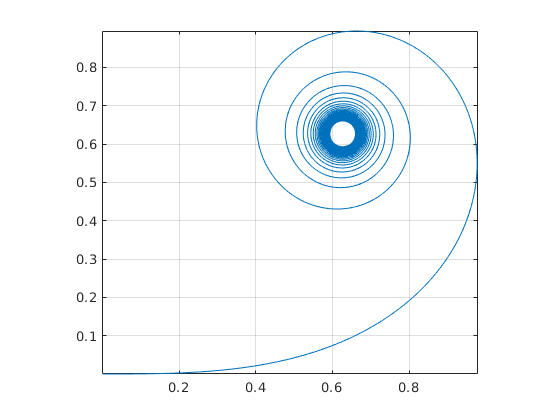

In [5]:
%% script m-file: Euler spiral
T = 15;
h = 0.001;
t = (0:h:T);
tmid = ( t(1:end-1)+t(2:end) )/2;
fx = @(z) cos(z.^2);
fy = @(z) sin(z.^2);
Ix = h/6 * ( fx(t(1:end-1)) + ...
             4*fx(tmid) + fx(t(2:end)) );
Iy = h/6 * ( fy(t(1:end-1)) + ...
             4*fy(tmid) + fy(t(2:end)) );
x = cumsum(Ix);
y = cumsum(Iy);

figure()
plot(x, y)
axis image
grid on